<a href="https://colab.research.google.com/github/Fhanafii/Klasifikasi-NaiveBayes-menggunakan-dataset-Jeruk/blob/main/Naive_bayes_dataset_jeruk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
#import dataset dari Google Drive memakai path
path = "/content/drive/MyDrive/Dataset/Jeruk.csv"
jeruk_ds = pd.read_csv(path)

In [ ]:
# Menampilkan dataset Jeruk
#jeruk_ds = jeruk_ds.drop(columns=['Color', 'Variety', 'Blemishes (Y/N)'])
jeruk_ds

,Size,Weight,Brix,pH,Softness,HarvestTime,Ripeness,Color,Variety,Blemishes (Y/N),Quality
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,3
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,4
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,6,4
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,3,20,8,4
237,7.4,275,8.5,3.5,5.0,20,5.0,1,10,0,3
238,7.5,196,15.7,3.0,3.0,13,3.0,0,21,5,4
239,7.2,251,9.8,4.3,3.0,23,1.0,1,11,5,2


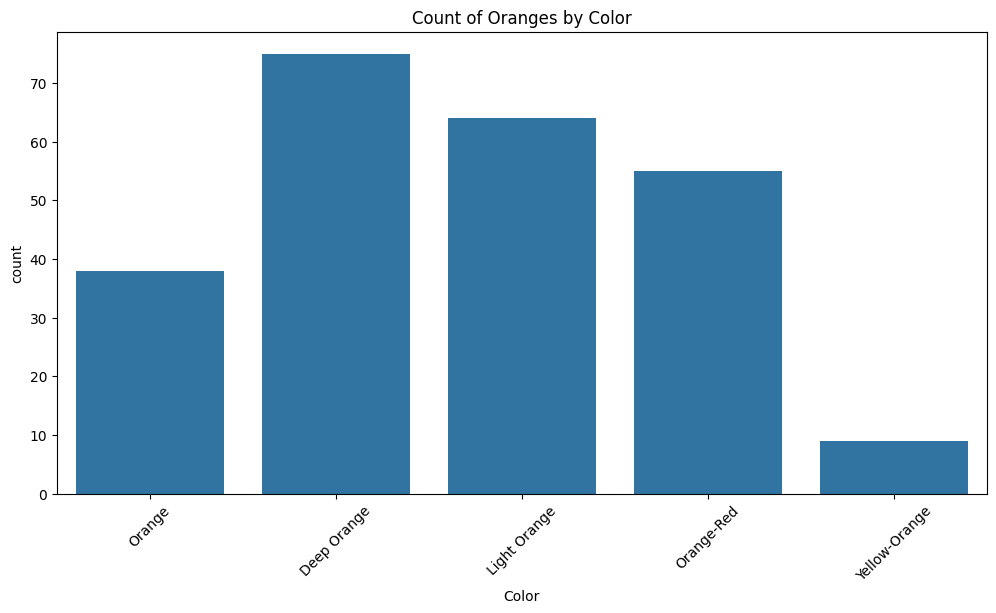

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Color", data=jeruk_ds)
plt.title("Count of Oranges by Color")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Encode variabel kategori
le = LabelEncoder()
jeruk_ds['Color'] = le.fit_transform(jeruk_ds['Color'])
jeruk_ds['Variety'] = le.fit_transform(jeruk_ds['Variety'])
jeruk_ds['Blemishes (Y/N)'] = le.fit_transform(jeruk_ds['Blemishes (Y/N)'])

In [ ]:
# Mengubah 'Quality (1-5)' menjadi kelas diskrit
bins = [1, 2, 3, 4, 5, 6]
labels = [1, 2, 3, 4, 5]
jeruk_ds['Quality'] = pd.cut(jeruk_ds['Quality'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
# Define feature columns dan target column
feature_columns = jeruk_ds.columns[:-1]
target_column = jeruk_ds.columns[-1]
X = jeruk_ds[feature_columns]
y = jeruk_ds[target_column]

In [ ]:
# Pisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi dan latih Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# membuat prediksi
y_pred = nb_model.predict(X_test)

In [ ]:
#membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2  1  0  0]
 [ 2  3  1  0]
 [ 3  3 10  5]
 [ 0  0  4 15]]


In [ ]:
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6122448979591837


<ipython-input-86-e105b066ef7e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_labels)


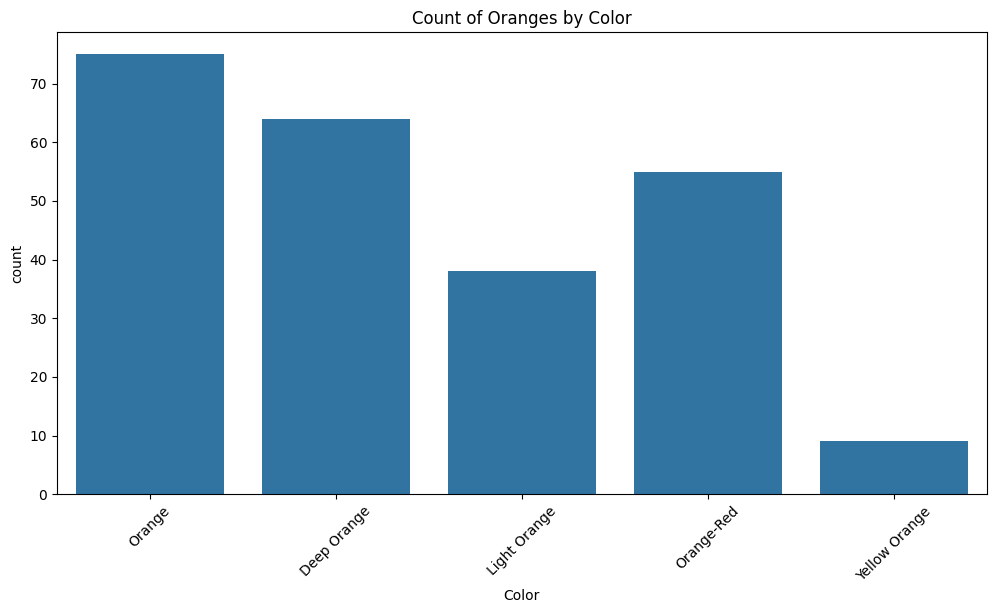

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x="Color", data=jeruk_ds)
plt.title("Count of Oranges by Color")
plt.xticks(rotation=45)
new_labels = ['Orange', 'Deep Orange', 'Light Orange', 'Orange-Red', 'Yellow Orange']

# Menambahkan label x-axis labels
ax.set_xticklabels(new_labels)

plt.show()